In [52]:
import pandas as pd
from math import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

In [4]:
df1=pd.read_csv("Star3642_balanced.csv") #data d'entrainements

In [5]:
encoder=LabelEncoder()
df1["SpType"]=encoder.fit_transform(df1["SpType"]) #on transforme SpType en chiffres
Y=df1["TargetClass"] 
X=df1[["Vmag","Plx","e_Plx","B-V","SpType"]]
#X["SpType"]=encoder.fit_transform(X["SpType"])

In [104]:
df1

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,522,16.678352,0
1,8.70,2.31,1.29,-0.045,99,15.518060,0
2,5.77,5.50,1.03,0.855,337,14.471813,0
3,6.72,5.26,0.74,-0.015,150,15.324928,1
4,8.76,13.44,1.16,0.584,293,19.401997,1
...,...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,515,14.856089,0
3638,8.29,6.38,1.00,0.408,208,17.314104,1
3639,6.11,2.42,0.79,1.664,539,13.029078,0
3640,7.94,4.94,2.90,0.210,53,16.408636,1


In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2) #On crée notre datasets

In [53]:
#On fait un test
model=KNeighborsClassifier(n_neighbors=20) #on entraine un modèle de KNeighbirsClassifier avec 20 voisins
model.fit(X_train,Y_train)
model.score(X_test,Y_test) #On regarde son score

0.897119341563786

In [31]:
#On détermine quel nombre de voisins est optimal
model1=KNeighborsClassifier()
k=np.arange(1,50)
train_score, val_score=validation_curve(model1,X_train,Y_train,'n_neighbors',k,cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


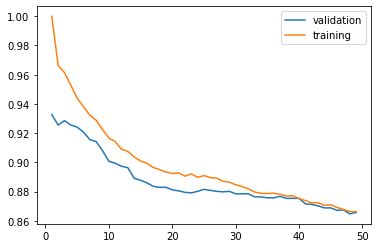

In [40]:
plt.plot(k,val_score.mean(axis=1),label="validation")
plt.plot(k,train_score.mean(axis=1),label="training")
plt.legend()

On prend donc n_neightbors=10 pour ne pas overfitter ni unerfitter

In [15]:
print("le score du modèle est {}".format(str(np.mean(cross_val_score(KNeighborsClassifier(10),X_train,Y_train,cv=5)))))

le score du modèle est 0.9062845926685646


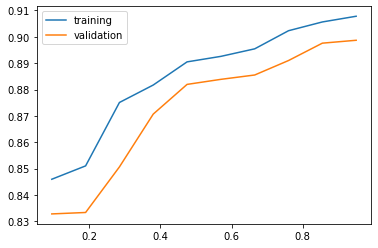

In [76]:
N,train_score,val_score=learning_curve(model,X,Y,train_sizes=np.linspace(0.1,1,10),cv=20)
plt.plot(N/len(X),train_score.mean(axis=1),label="training")
plt.plot(N/len(X),val_score.mean(axis=1),label="validation")
plt.legend()

On voit qu'on pourrait avoir de meilleurs résultats si nous avions plus de données d'entrainements, on va donc prendre un test size égal à 0.1 pour ne pas overfitter sur le trainset

In [78]:
model=KNeighborsClassifier(n_neighbors=10) #on entraine un modèle de KNeighbirsClassifier avec 20 voisins
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.915068493150685

In [117]:
df2=pd.read_csv("Star9999_raw.csv") #Data que l'on veut traiter
df2=df2.drop("Unnamed: 0",axis=1) #On enlève la colonne d'index

#On enlève toutes les lignes qui ont des données manquantes
df2=df2.dropna(axis=0)

#On change les types des variables en float
df3=df2[["Vmag","Plx","e_Plx","B-V"]].astype(float)
df2[["Vmag","Plx","e_Plx","B-V"]]=df3[["Vmag","Plx","e_Plx","B-V"]]
#On crée une nouvelle variable qui permet la détection
df2["Amag"]=df2["Vmag"]+5*(np.log10(df2["Plx"])+1)
df2=df2.dropna(axis=1)




C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


9679

In [114]:
df2["TargetClass"]=model.predict(df2)

In [109]:
df2["TargetClass"]

0       0
1       0
2       1
3       1
4       0
       ..
9674    0
9675    0
9676    1
9677    1
9678    0
Name: TargetClass, Length: 9679, dtype: int64

In [110]:
df2.to_csv("Starfinie_raw.csv")